___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import BallTree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)     

#### Load Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Renaming the 'Annual Income (k$)' column to 'Annual_Income'
# and'Spending Score (1-100)' column to 'Spending_Score' for 
#clarity and consistency
df.rename(columns={"Annual Income (k$)":"Annual_Income",
          'Spending Score (1-100)': 'Spending_Score'}, inplace=True)
print("Columns renamed successfully\nAnnual Income (k$) to Annual_Income\n"
      "Spending Score (1-100) to Spending_Score")

Columns renamed successfully
Annual Income (k$) to Annual_Income
Spending Score (1-100) to Spending_Score


In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [7]:
df.duplicated().sum()

0

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [8]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
print('Mean of Age:', df.Age.mean())
print('Min of Age:', df.Age.min())
print('Max of Age:', df.Age.max())

Mean of Age: 38.85
Min of Age: 18
Max of Age: 70


In [11]:
print('Mean of Spending_Score:', df.Spending_Score.mean())
print('Min of Spending_Score:', df.Spending_Score.min())
print('Max of Spending_Score:', df.Spending_Score.max())

Mean of Spending_Score: 50.2
Min of Spending_Score: 1
Max of Spending_Score: 99


In [12]:
print('Mean of Annual_Income:', df.Annual_Income.mean())
print('Min of Annual_Income:', df.Annual_Income.min())
print('Max of Annual_Income:', df.Annual_Income.max())

Mean of Annual_Income: 60.56
Min of Annual_Income: 15
Max of Annual_Income: 137


In [13]:
# Access the 'Spending_Score' column of the DataFrame df to calculate
#the maximum value in the 'Spending_Score' column
df[(df['Spending_Score'] == df['Spending_Score'].max())]

,CustomerID,Gender,Age,Annual_Income,Spending_Score
11,12,Female,35,19,99


In [14]:
# Access the 'Annual_Income' column of the DataFrame df to calculate
#the maximum value in the 'Annual_Income' column
df[(df['Annual_Income'] == df['Annual_Income'].max())]

,CustomerID,Gender,Age,Annual_Income,Spending_Score
198,199,Male,32,137,18
199,200,Male,30,137,83


In [15]:
# Calculate the number of unique 'CustomerID' values in the DataFrame df
df.CustomerID.nunique()

200

In [16]:
# Remove the 'CustomerID' column from df along the columns (axis=1)
# The 'inplace=True' parameter ensures the change is made directly 
#to the original DF without creating new one
df.drop('CustomerID', axis=1, inplace=True)

In [17]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [18]:
# Select columns with numerical data (dtype=np.number) from the df
# These columns are stored in the new DataFrame df_num
df_num = df.select_dtypes(include=np.number)

# Display the first few rows of the DataFrame df_num to inspect the 
#selected numerical columns
df_num_head = df_num.head()

In [19]:
# Compute and store the correlation matrix for numerical columns in df_num
df_num.corr()

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


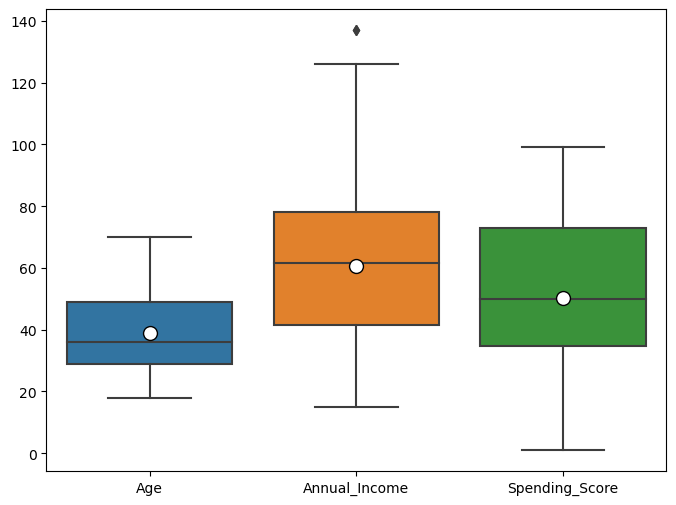

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df, showmeans=True,
            meanprops={"marker": "o",
                       "markerfacecolor": "white",
                       "markeredgecolor": "black",
                       "markersize": "10"})
plt.show()

In [21]:
# Select columns 'Gender' and 'Annual_Income' from the df
# Create a new df with only these selected columns
average_income_by_gender = df[['Gender', 'Annual_Income']].groupby('Gender', as_index = False).mean()
average_income_by_gender

,Gender,Annual_Income
0,Female,59.250000
1,Male,62.227273


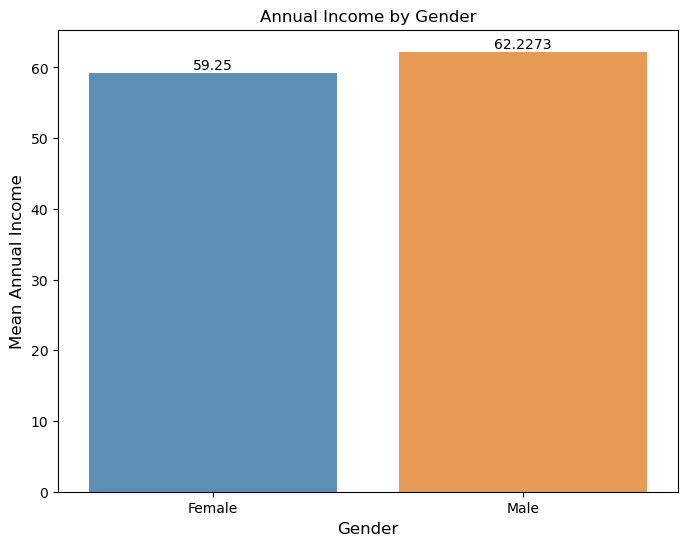

In [22]:
# Create a bar plot to visualize the average annual income by gender
fig, ax = plt.subplots(figsize=(8, 6))

# Use seaborn to create a bar plot
# 'x' represents the 'Gender' data, and 'y' represents the 'Annual_Income' data
sns.barplot(x='Gender', y='Annual_Income', data=average_income_by_gender, alpha=0.8, ax=ax)

# Set plot title, X and Y labels, and customize font size
plt.title('Annual Income by Gender')
plt.ylabel('Mean Annual Income', fontsize=12)
plt.xlabel('Gender', fontsize=12)
for container in ax.containers:
    ax.bar_label(container)
# Display the bar plot
plt.show()

In [23]:
# Selecting columns 'Gender' and 'Spending_Score' from the DataFrame df
# Creating a new df called 'avg_spending_by_gender', which groups the data by 'Gender' and calculates the mean (average) of 'Spending_Score'
avg_spending_by_gender = df[['Gender', 'Spending_Score']].groupby('Gender', as_index=False).mean()
avg_spending_by_gender

,Gender,Spending_Score
0,Female,51.526786
1,Male,48.511364


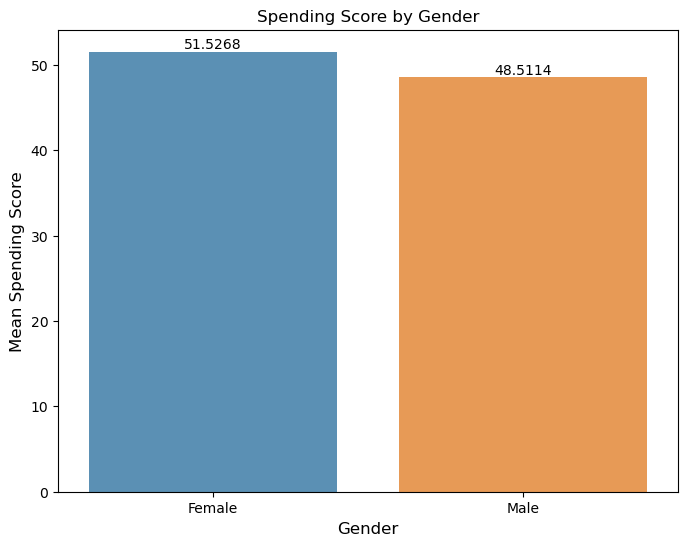

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Gender', y='Spending_Score', data=avg_spending_by_gender, alpha=0.8, ax=ax)
plt.title('Spending Score by Gender')
plt.ylabel('Mean Spending Score', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [25]:
avg_gender_by_age = df[['Gender', 'Age']].groupby('Gender', as_index = False).mean()
avg_gender_by_age

,Gender,Age
0,Female,38.098214
1,Male,39.806818


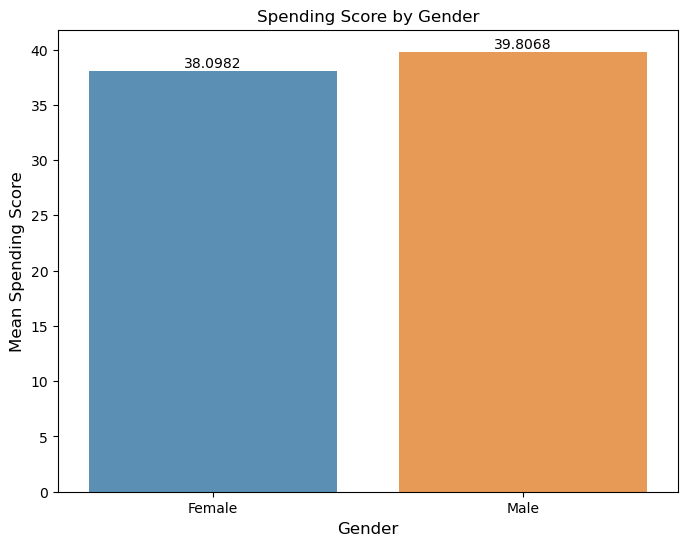

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='Gender', y='Age', data=avg_gender_by_age, alpha=0.8, ax=ax)
plt.title('Spending Score by Gender')
plt.ylabel('Mean Spending Score', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

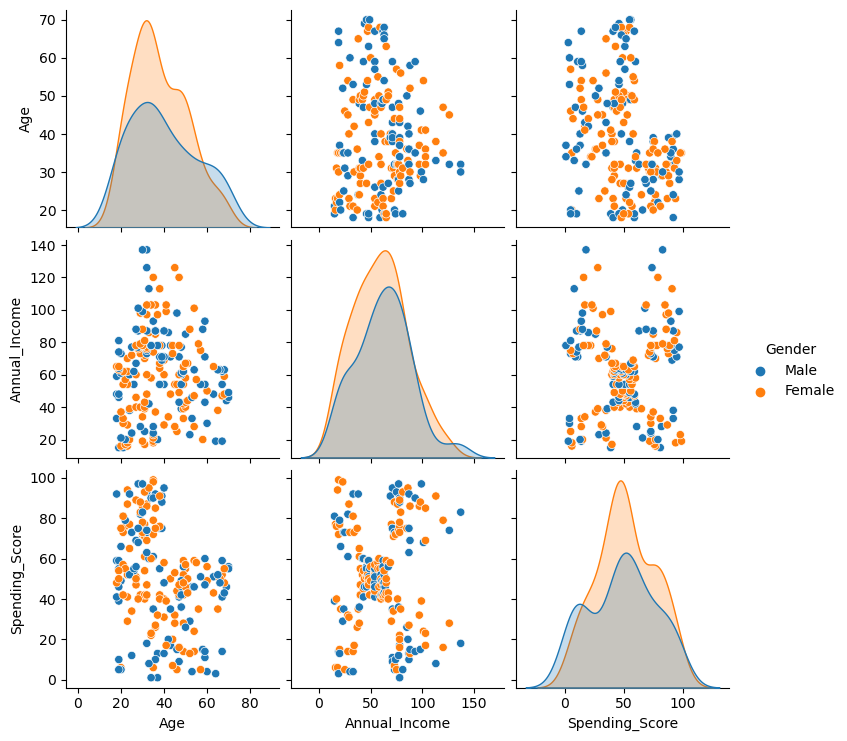

In [27]:
sns.pairplot(df, hue='Gender')
plt.show()

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [29]:
df1 = df.drop(columns="Gender")

In [33]:
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.

    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.

    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)

    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """

    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)

    # Sample n observations from D : P

    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')

    data_frame_sample = data_frame.sample(n=sampling_size)

    # Get the distance to their neirest neighbors in D : X

    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]

    # Randomly simulate n points with the same variation as in D : Q.

    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()

    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)

    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)

    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)

    # Get the distance to their neirest neighbors in D : Y

    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist

    # return the hopkins score

    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)

    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')

    return x / (x + y)[0]

In [34]:
hopkins(df1, df1.shape[0])

0.30995239214794384

In [35]:
X1=df[['Age','Spending_Score']]
X1.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [36]:
X1.shape

(200, 2)

In [37]:
hopkins(X1, X1.shape[0])

0.2743854452144807

#### *ii. Determine optimal number of clusters*

In [38]:
from sklearn.cluster import KMeans
ssd = []

K = range(2,11)

for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(X1)
    ssd.append(model.inertia_)

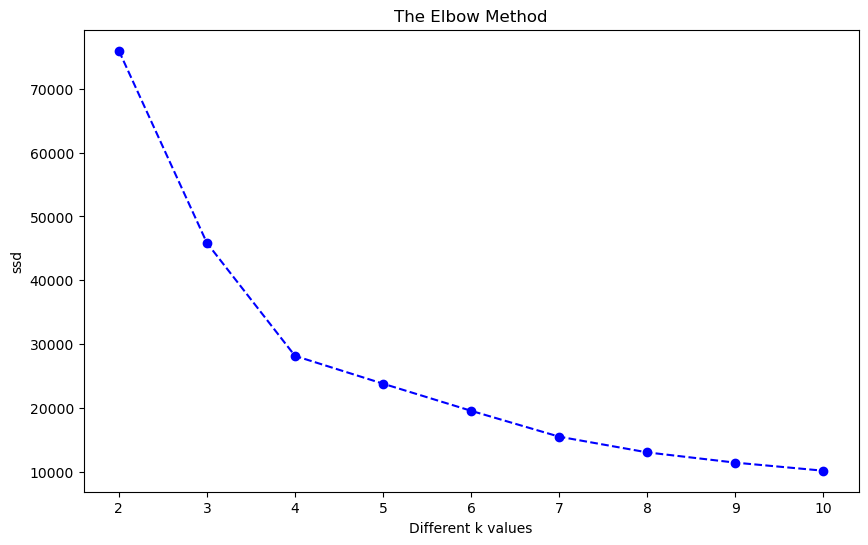

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("ssd") 
plt.title("The Elbow Method") 
plt.show()

In [40]:
ssd

[75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23811.52352472089,
 19566.522341377604,
 15514.193134351028,
 13055.626865965573,
 11453.288911292719,
 10186.501073242376]

In [41]:
-pd.Series(ssd).diff()

0             NaN
1    30108.479394
2    17675.093049
3     4354.060042
4     4245.001183
5     4052.329207
6     2458.566268
7     1602.337955
8     1266.787838
dtype: float64

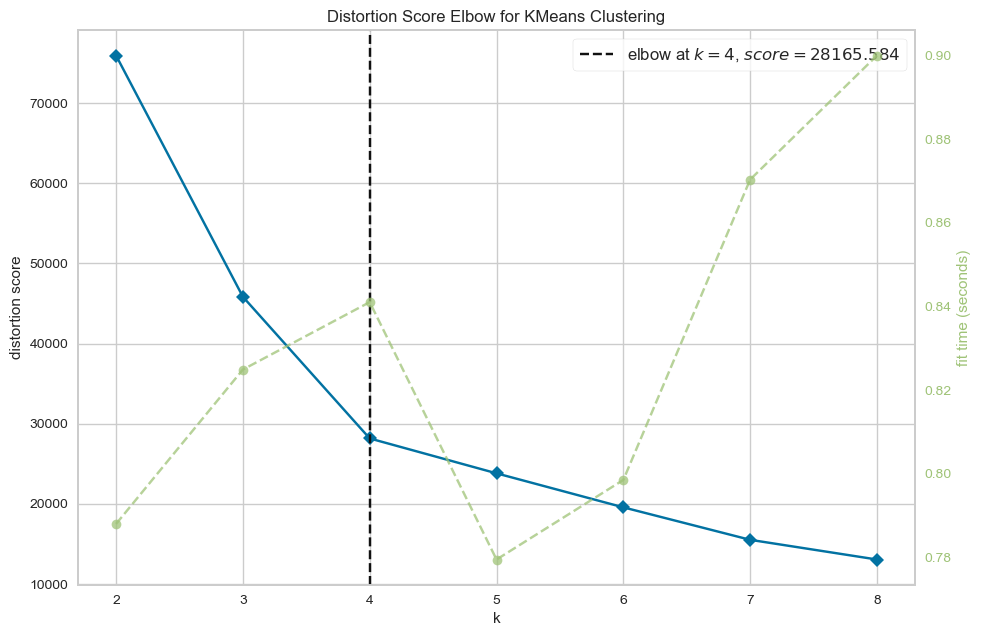

In [42]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2, 9), size=(1080, 720))

visualizer.fit(X1)        
visualizer.poof();

In [43]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.44526667994351227
For n_clusters=6, the silhouette score is 0.44845919861907363
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.4280182657184854
For n_clusters=9, the silhouette score is 0.41447652571263843
For n_clusters=10, the silhouette score is 0.40744304730373593


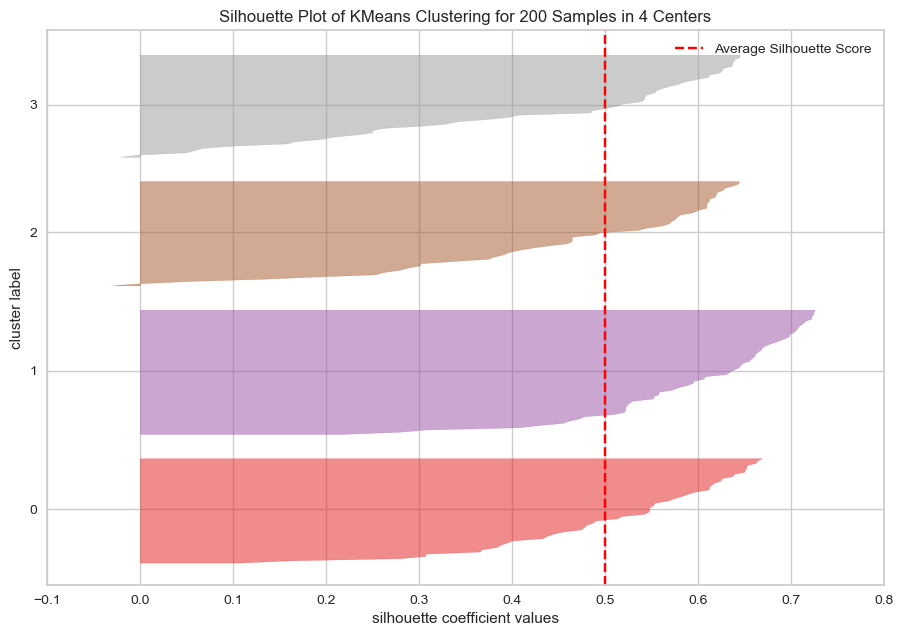

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [44]:
from yellowbrick.cluster import SilhouetteVisualizer

model_ssd = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model_ssd, size=(1080, 720))

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof()

In [45]:
for i in range(model_ssd.n_clusters):
    label = (model_ssd.labels_ == i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.5091299145013191
mean silhouette score for label 1    : 0.5960779476836082
mean silhouette score for label 2    : 0.45429047261675404
mean silhouette score for label 3    : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


### Why silhouette_score is negative?

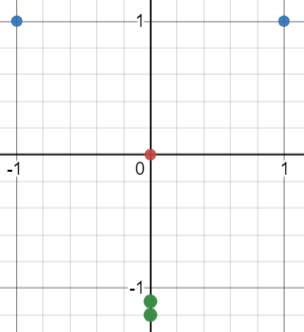

#### *iii. Apply K Means*

In [46]:
modelk = KMeans(n_clusters=4, random_state=42)

In [47]:
y_kmeans = modelk.fit_predict(X1)

In [48]:
X1.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [49]:
df['clusterx1_k'] = y_kmeans
df.head()

,Gender,Age,Annual_Income,Spending_Score,clusterx1_k
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,3


In [50]:
df['clusterx1_k'].unique()

array([3, 1, 2, 0])

In [51]:
df.groupby('Gender')['clusterx1_k'].value_counts()

Gender  clusterx1_k
Female  1              33
        3              29
        0              26
        2              24
Male    1              24
        2              24
        0              22
        3              18
Name: count, dtype: int64

In [52]:
df.groupby(['Gender', 'clusterx1_k'])['Age'].mean()

Gender  clusterx1_k
Female  0              54.153846
        1              29.787879
        2              43.583333
        3              28.620690
Male    0              57.545455
        1              30.708333
        2              43.000000
        3              26.000000
Name: Age, dtype: float64

#### *iv. Visualizing and Labeling All the Clusters*

In [53]:
centers = modelk.cluster_centers_ # merkez noktasi koordinatlari
centers

array([[55.70833333, 48.22916667],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [27.61702128, 49.14893617]])

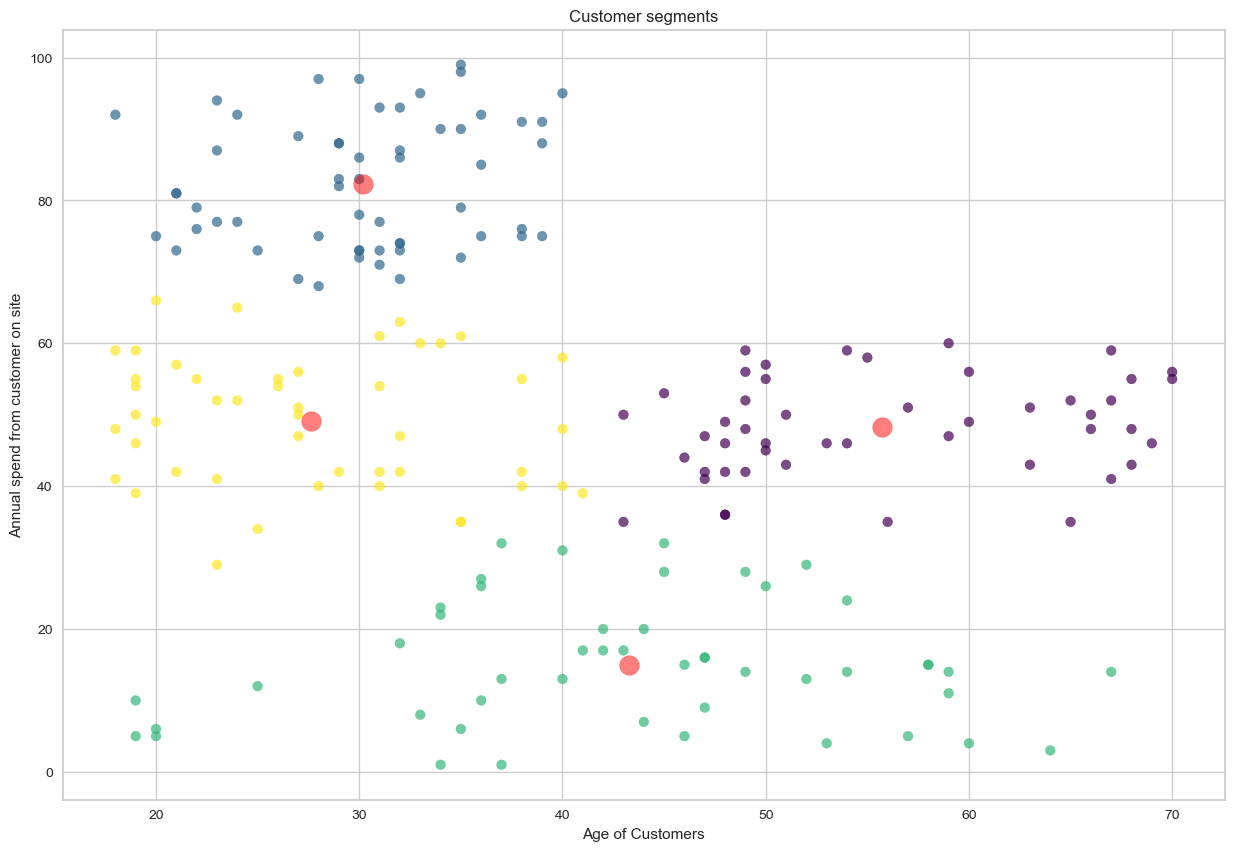

In [54]:
plt.figure(figsize=(15, 10))
plt.scatter(df["Age"], df["Spending_Score"],
            c=df.clusterx1_k, cmap="viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Customer segments')
plt.xlabel('Age of Customers')
plt.ylabel('Annual spend from customer on site');

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [55]:
X2=df[['Annual_Income','Spending_Score']]
X2.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [56]:
X2.shape

(200, 2)

In [57]:
hopkins(X2, X2.shape[0])

0.3014402348579188

#### *ii. Determine optimal number of clusters*

In [58]:
ssd = []

K = range(2,11)

for k in K:
    kmeans = KMeans(n_clusters =k, random_state=42)
    kmeans.fit(X2)
    ssd.append(kmeans.inertia_)

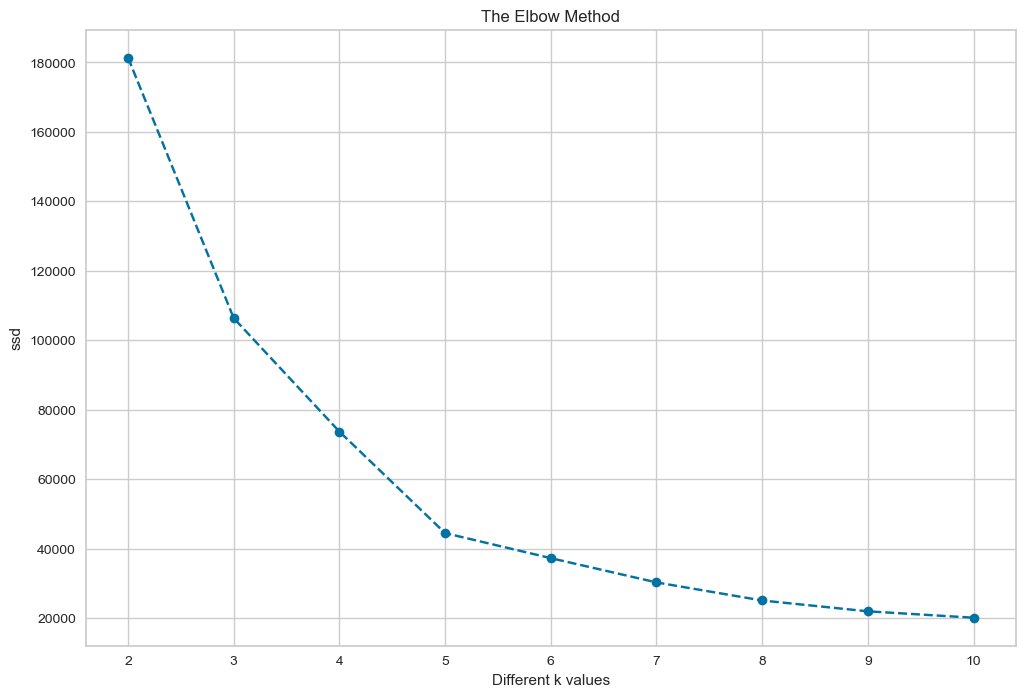

In [59]:
plt.figure(figsize=(12, 8))
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("ssd") 
plt.title("The Elbow Method");

In [60]:
ssd

[181363.595959596,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30241.34361793659,
 25036.417604033984,
 21916.794789843727,
 20072.070939404006]

In [61]:
-pd.Series(ssd).diff()

0             NaN
1    75015.222897
2    32668.584023
3    29231.333592
4     7214.640937
5     6992.470893
6     5204.926014
7     3119.622814
8     1844.723850
dtype: float64

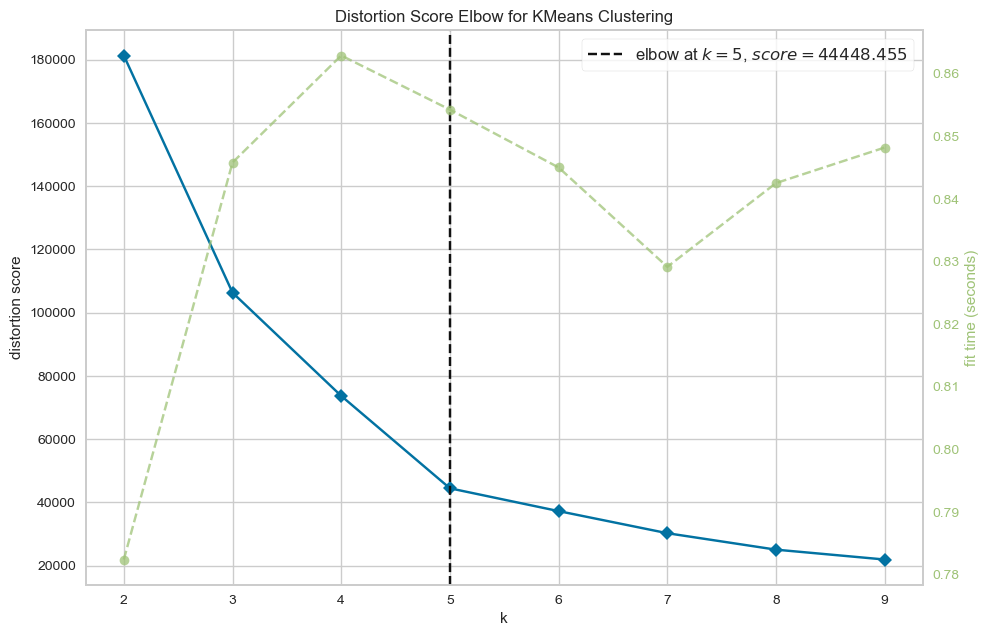

In [62]:
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2, 10), size=(1080, 720))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

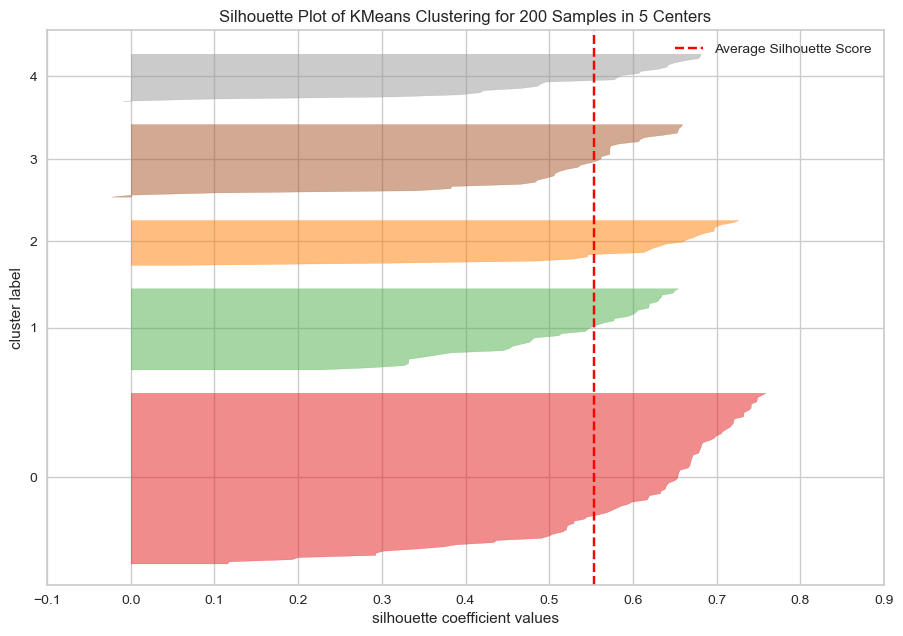

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [63]:
model4 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model4, size=(1080, 720))

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof()

#### *iii. Apply K Means*

In [64]:
model = KMeans(n_clusters=5, random_state=42)

In [65]:
y_kmeans = model.fit_predict(X2)

In [66]:
X2.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [67]:
df['clusterx2_k'] = y_kmeans
df.head()

,Gender,Age,Annual_Income,Spending_Score,clusterx1_k,clusterx2_k
0,Male,19,15,39,3,4
1,Male,21,15,81,1,2
2,Female,20,16,6,2,4
3,Female,23,16,77,1,2
4,Female,31,17,40,3,4


In [68]:
df['clusterx2_k'].unique()

array([4, 2, 0, 1, 3])

#### *iv. Visualizing and Labeling All the Clusters*

In [69]:
centers = model.cluster_centers_ 
centers

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

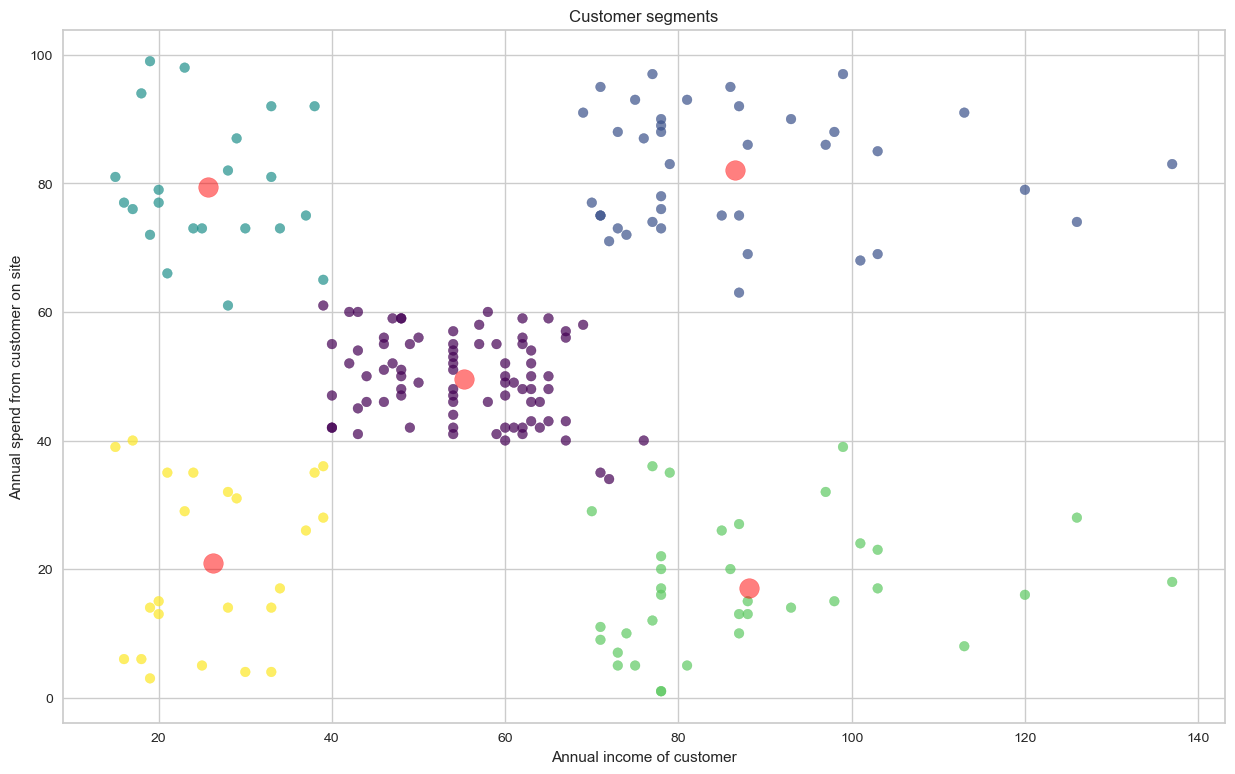

In [70]:
plt.figure(figsize=(15, 9))
plt.scatter(df["Annual_Income"], df["Spending_Score"], c = df.clusterx2_k, cmap = "viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site');

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [71]:
from scipy.cluster.hierarchy import dendrogram, linkage
X1.head()

,Age,Spending_Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [72]:
hc_ward = linkage(y=X1, method="ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

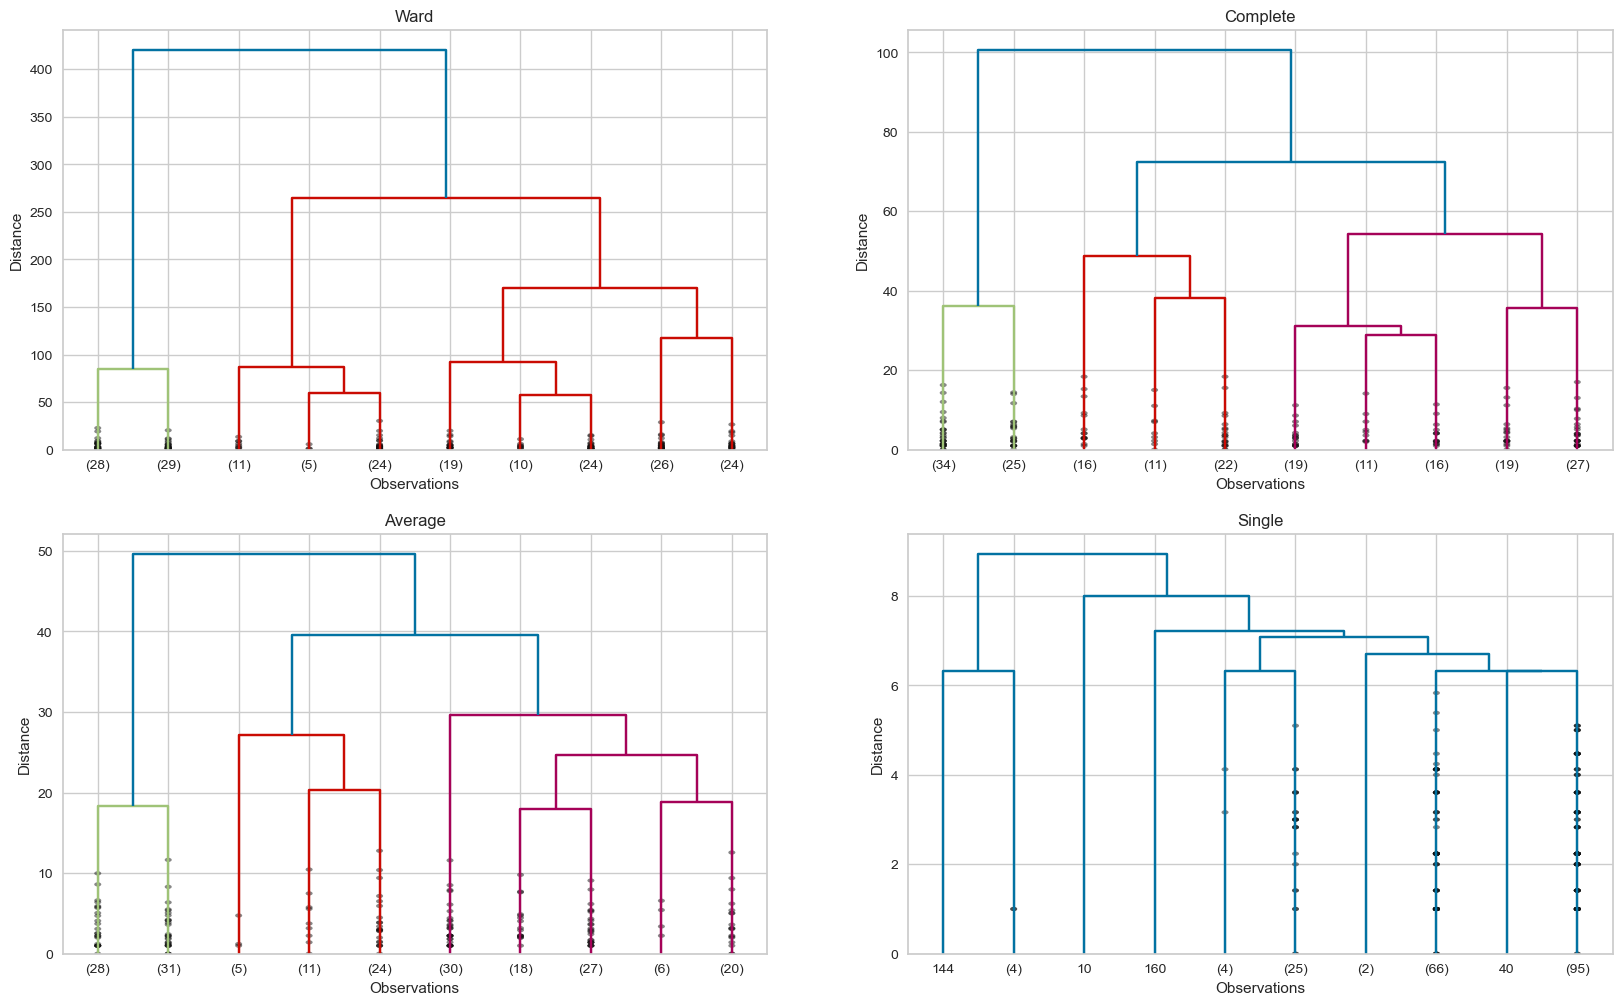

In [73]:
plt.figure(figsize=(20, 12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)
plt.show()

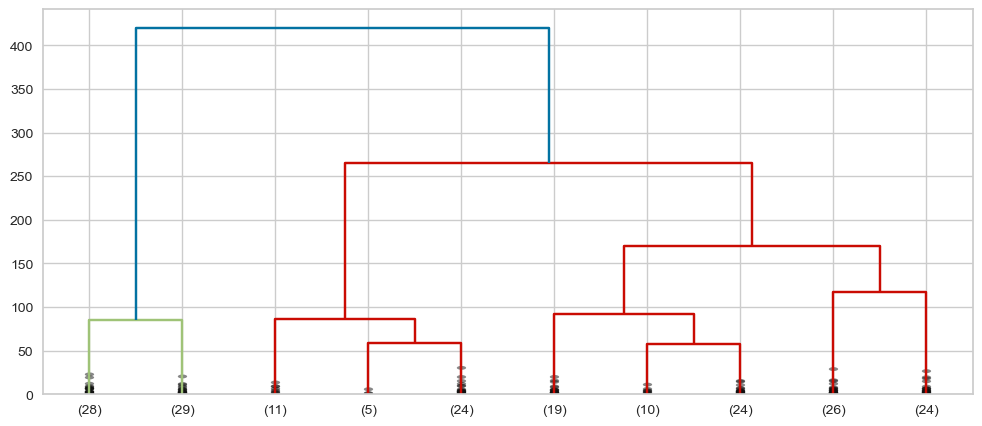

In [74]:
plt.figure(figsize = (12,5))
dendrogram(hc_ward, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)
plt.show()

### ii. *Apply Agglomerative Clustering*

In [75]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model.labels_)}')

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091
Silhouette Score for 10 clusters: 0.3876666104778445


In [76]:
model = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X1)

In [77]:
df["clusterx1_h"] = clusters
df.head()

,Gender,Age,Annual_Income,Spending_Score,clusterx1_k,clusterx2_k,clusterx1_h
0,Male,19,15,39,3,4,0
1,Male,21,15,81,1,2,3
2,Female,20,16,6,2,4,2
3,Female,23,16,77,1,2,3
4,Female,31,17,40,3,4,0


In [78]:
df.clusterx1_h.unique()

array([0, 3, 2, 1], dtype=int64)

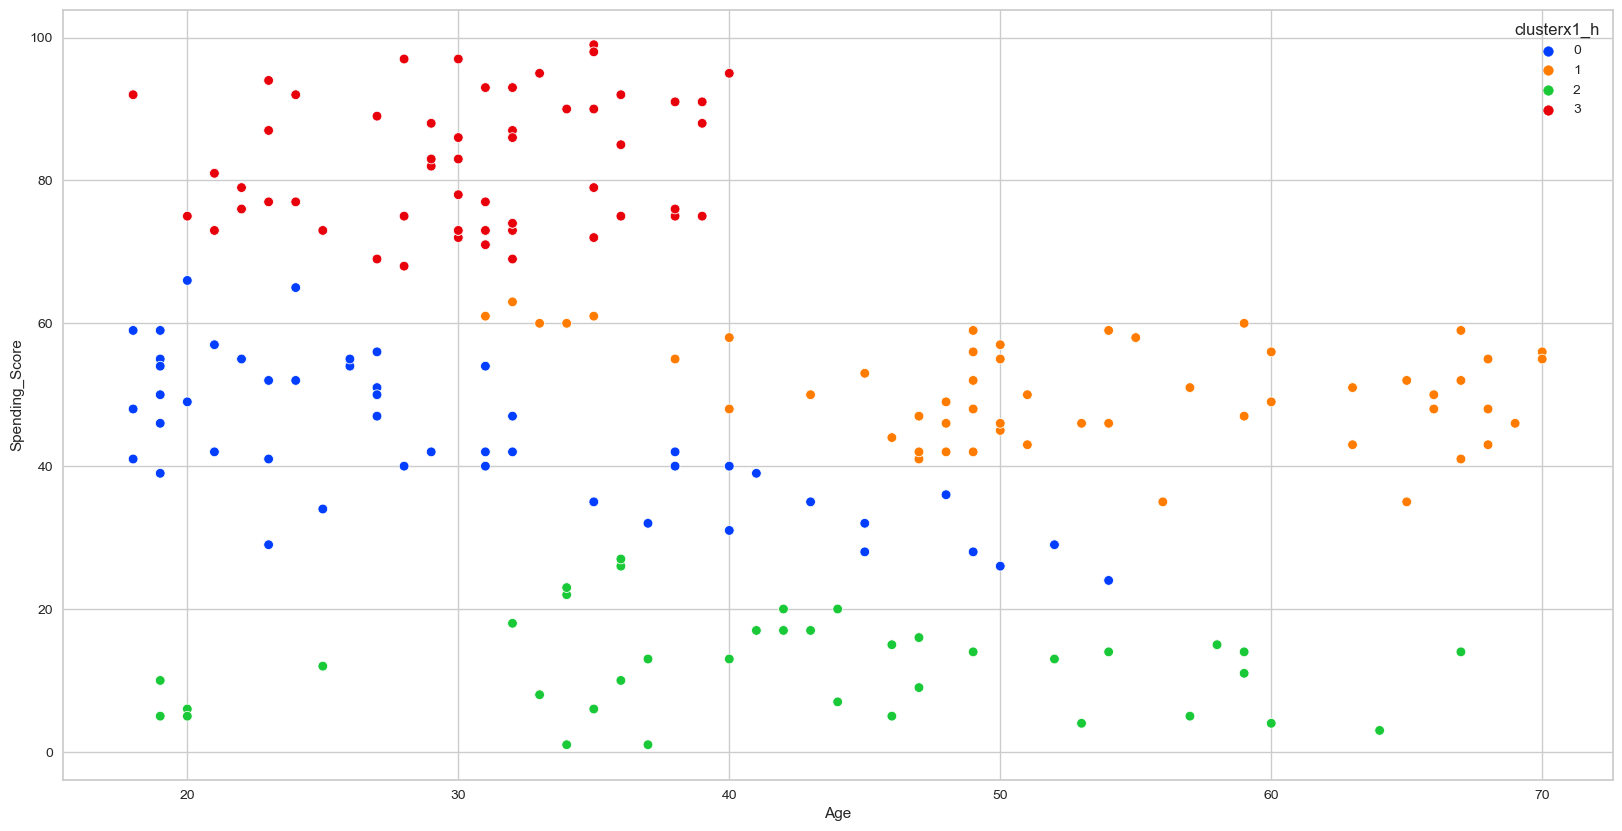

In [79]:
plt.figure(figsize = (20,10))
sns.scatterplot(x='Age', y='Spending_Score', hue = df.clusterx1_h, data=df ,palette="bright")
plt.show()

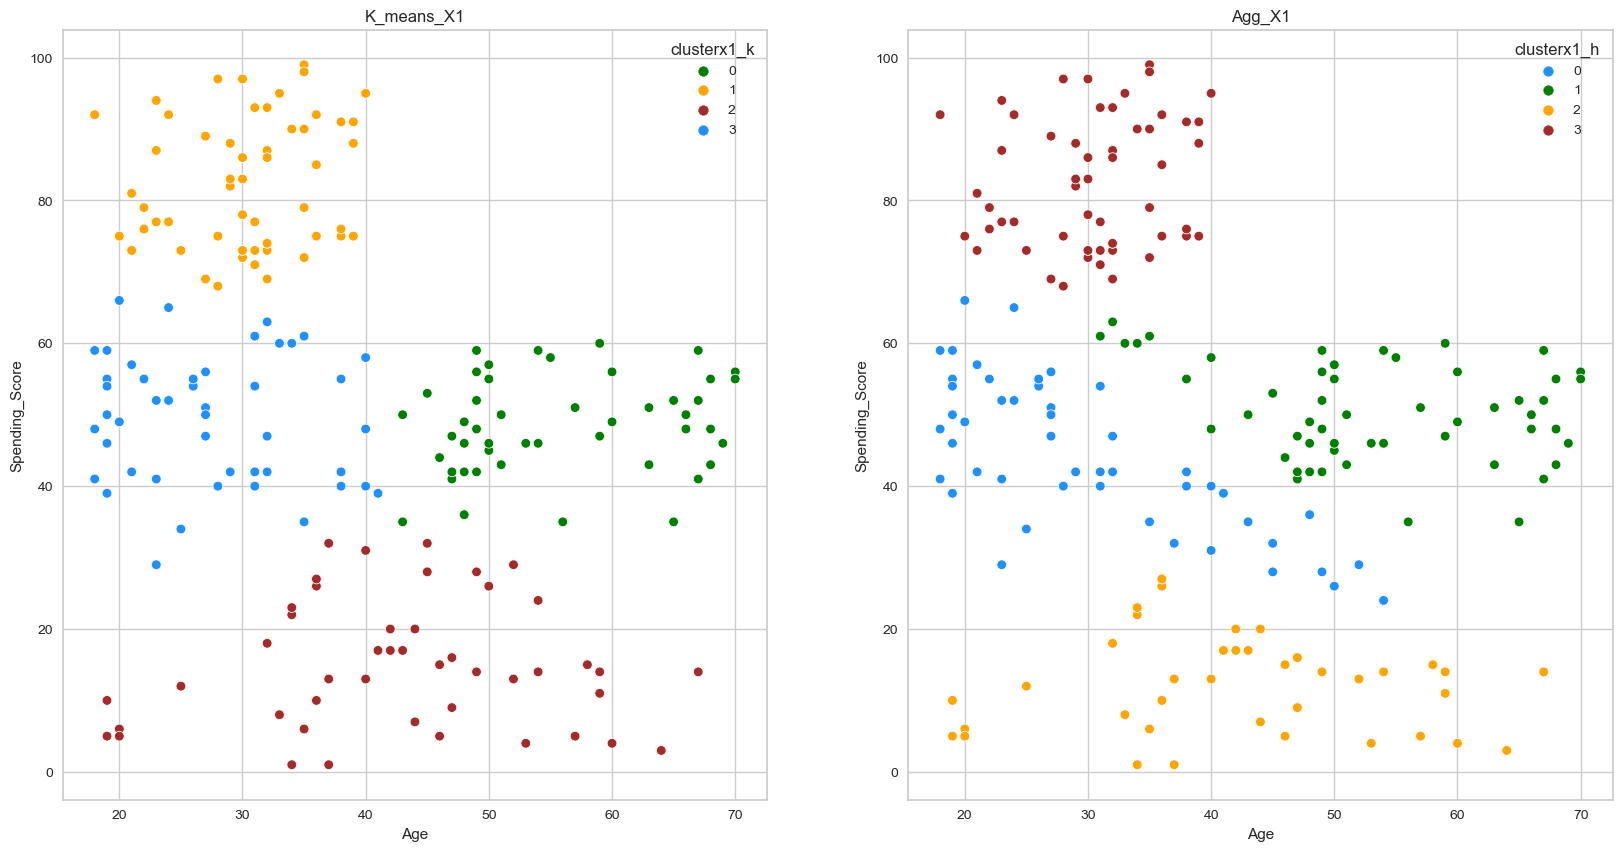

In [80]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='Age', y='Spending_Score', hue='clusterx1_k', data=df, palette=['green', 'orange', 'brown',
                                                                                     'dodgerblue'])
plt.title("K_means_X1")

plt.subplot(122)
sns.scatterplot(x='Age', y='Spending_Score', hue='clusterx1_h', data=df, palette=['dodgerblue', 'green',
                                                                                  'orange', 'brown'])
plt.title("Agg_X1")
plt.show()

## Clustering based on Annual Income and Spending Score- x2

In [81]:
X2.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [82]:
hc_ward = linkage(y=X2, method="ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

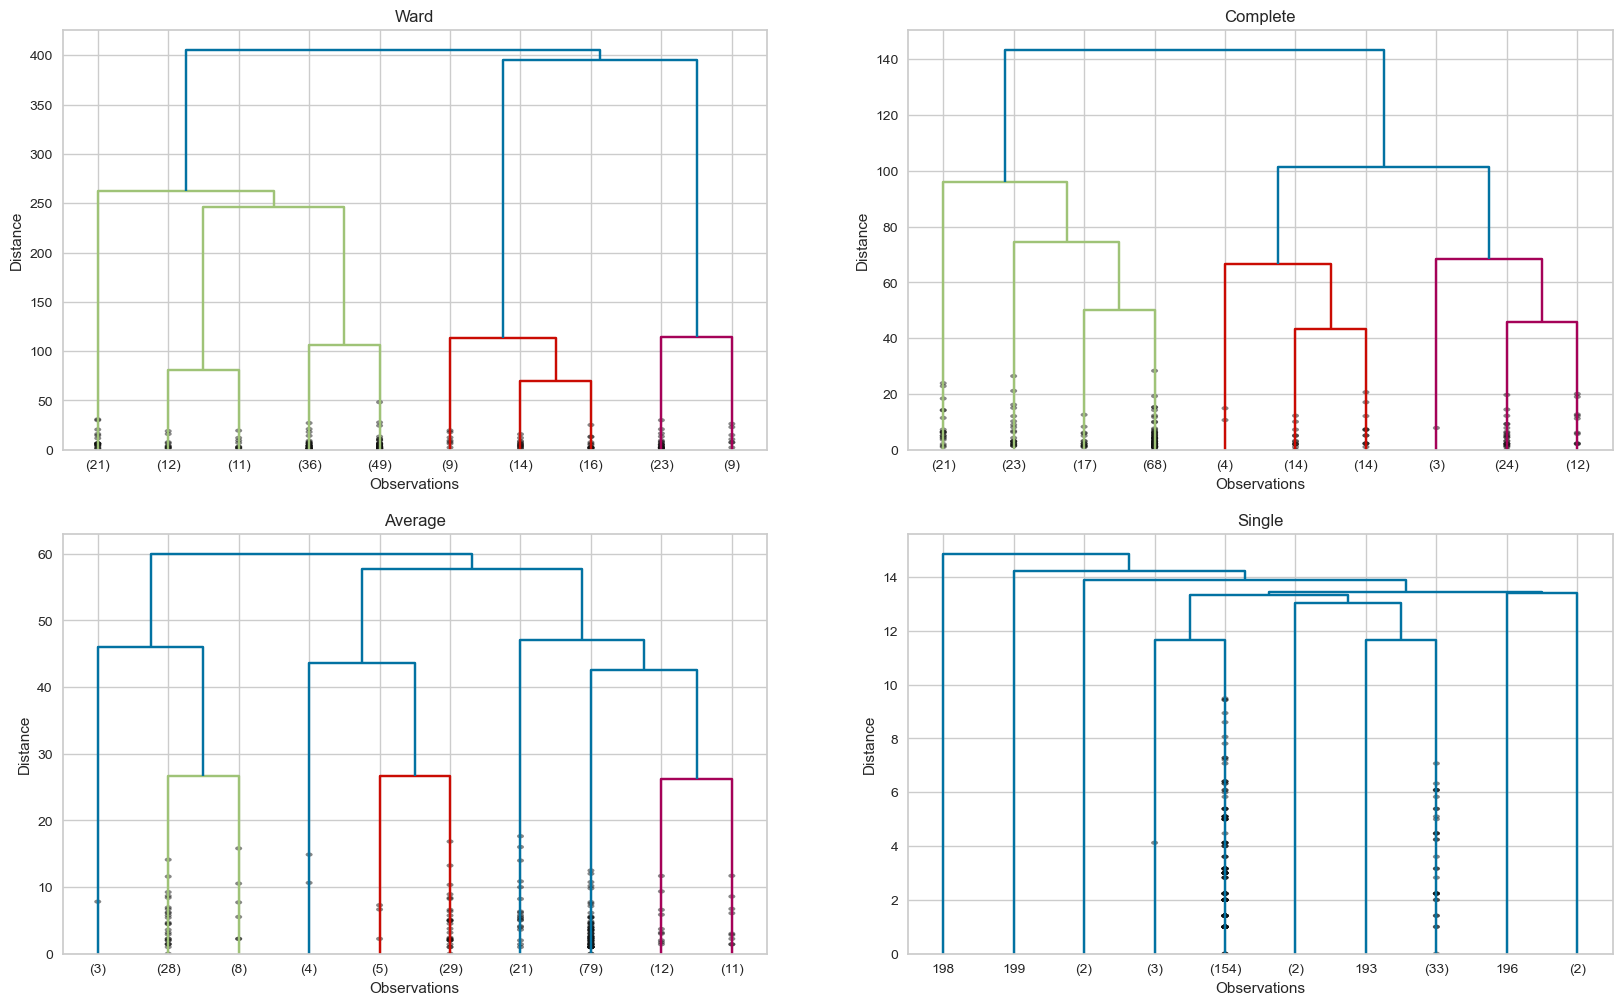

In [83]:
plt.figure(figsize=(20, 12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)
plt.show()

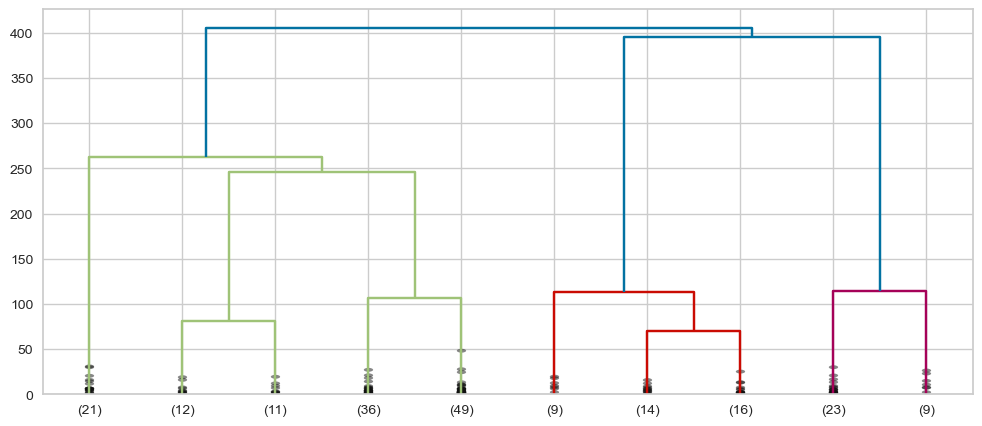

In [84]:
plt.figure(figsize = (12,5))
dendrogram(hc_ward, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)
plt.show()

In [85]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507
Silhouette Score for 10 clusters: 0.4342656377895271


In [86]:
model = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X2)

In [87]:
df["clusterx2_h"] = clusters
df.head()

,Gender,Age,Annual_Income,Spending_Score,clusterx1_k,clusterx2_k,clusterx1_h,clusterx2_h
0,Male,19,15,39,3,4,0,4
1,Male,21,15,81,1,2,3,3
2,Female,20,16,6,2,4,2,4
3,Female,23,16,77,1,2,3,3
4,Female,31,17,40,3,4,0,4


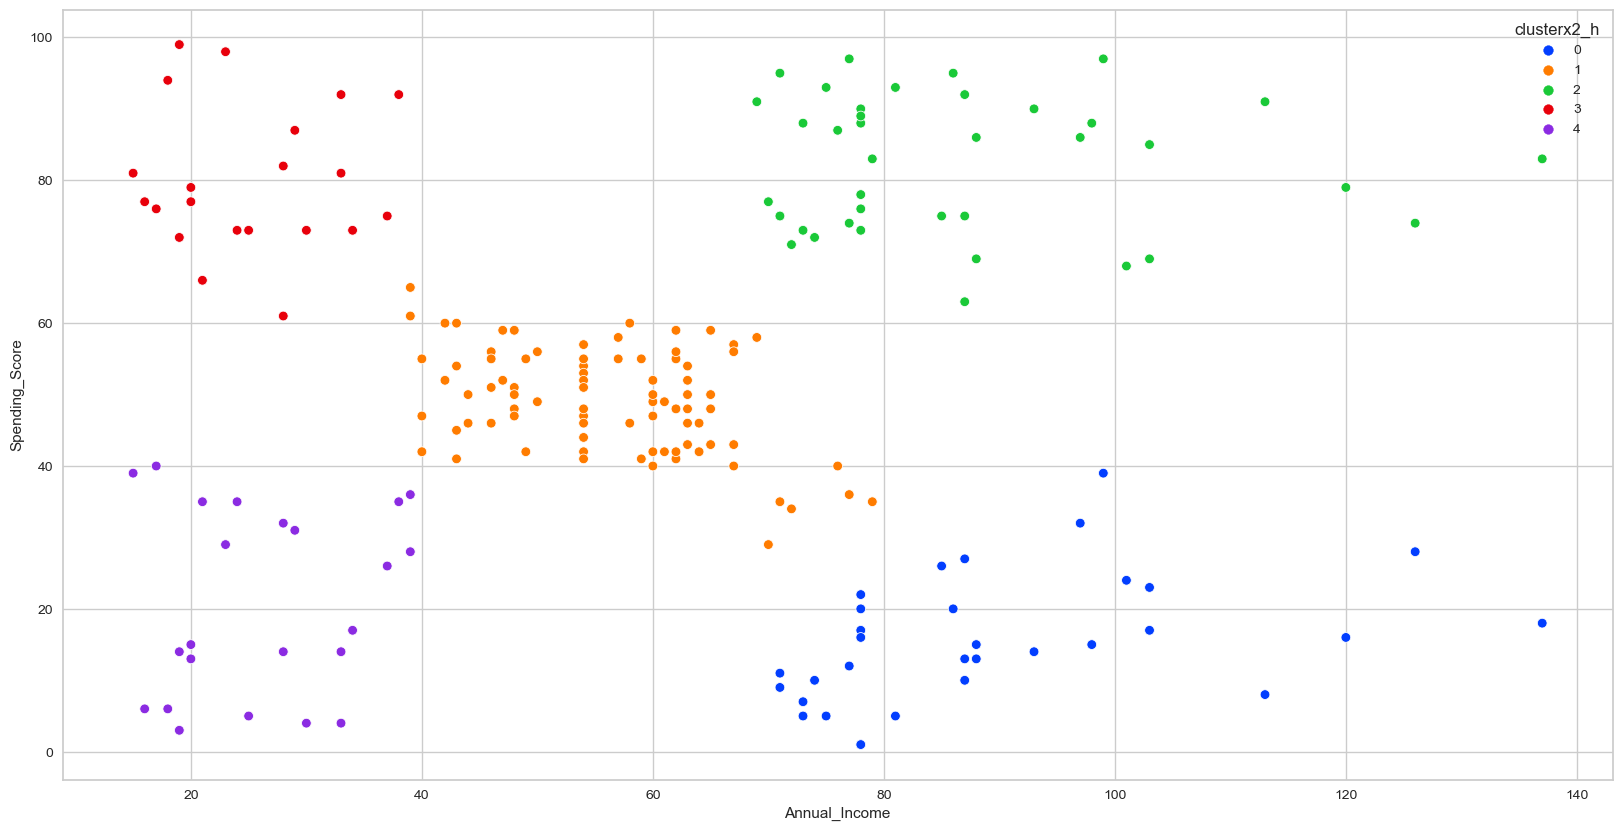

In [88]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Annual_Income', y='Spending_Score',
                hue=df.clusterx2_h, data=df, palette="bright")
plt.show()

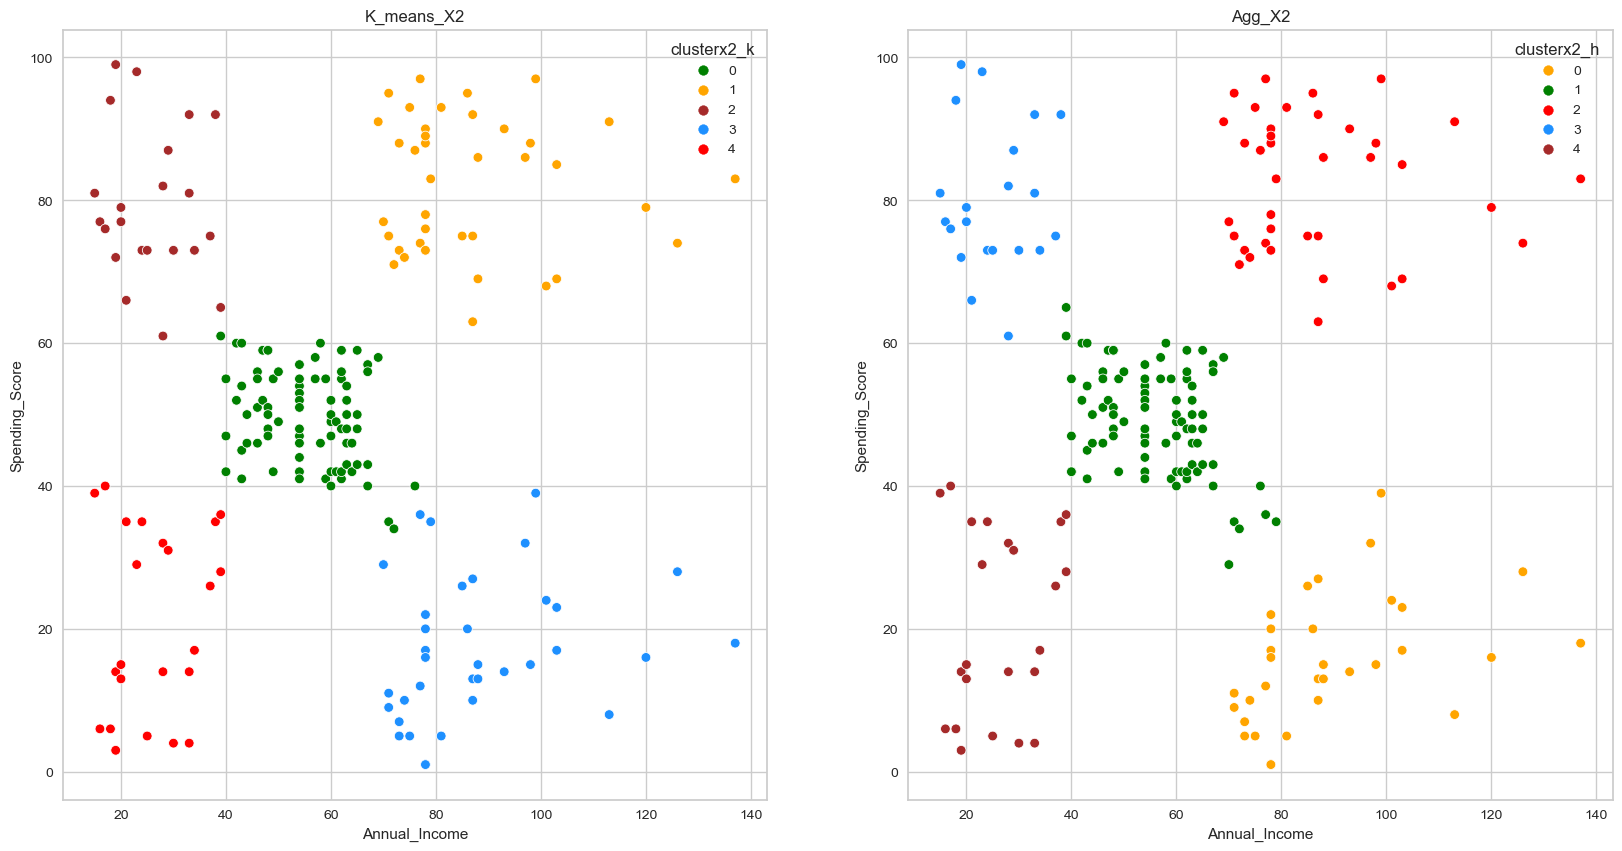

In [89]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='clusterx2_k', data=df, palette=['green', 'orange',
                                                                                  'brown', 'dodgerblue', 'red'])
plt.title("K_means_X2")

plt.subplot(122)
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='clusterx2_h', data=df, palette=['orange', 'green',
                                                                                  'red', 'dodgerblue', 'brown'])
plt.title("Agg_X2")
plt.show()

In [90]:
df.head()

,Gender,Age,Annual_Income,Spending_Score,clusterx1_k,clusterx2_k,clusterx1_h,clusterx2_h
0,Male,19,15,39,3,4,0,4
1,Male,21,15,81,1,2,3,3
2,Female,20,16,6,2,4,2,4
3,Female,23,16,77,1,2,3,3
4,Female,31,17,40,3,4,0,4


In [91]:
X_h = df[['Age', 'Annual_Income','Spending_Score']]
X_h.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [92]:
from scipy.cluster.hierarchy import dendrogram, linkage
hc_ward = linkage(y = X_h, method="ward")
hc_complete = linkage(X_h, "complete")
hc_average = linkage(X_h, "average")
hc_single = linkage(X_h, "single")

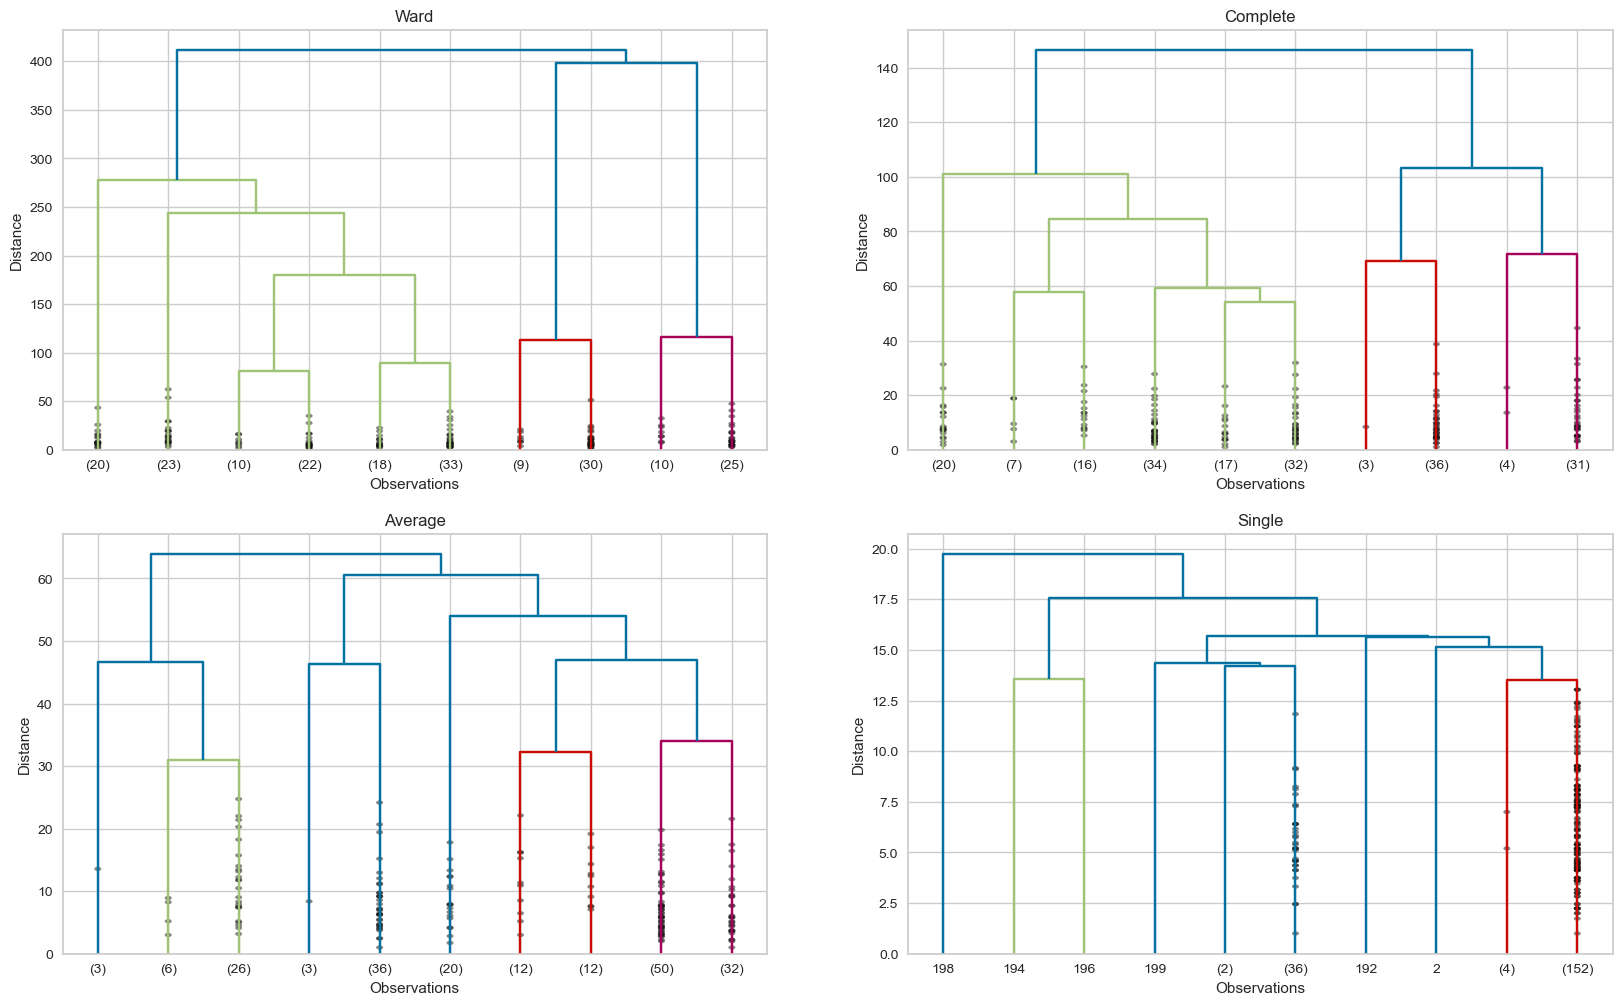

In [93]:
plt.figure(figsize=(20, 12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)
plt.show()

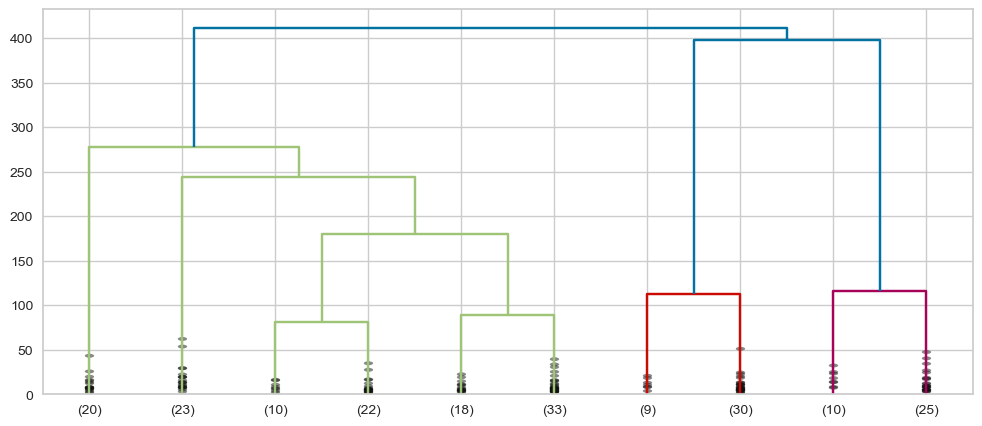

In [94]:
plt.figure(figsize=(12, 5))
dendrogram(hc_ward, truncate_mode="lastp", p=10,
           show_contracted=True, leaf_font_size=10)
plt.show()

In [95]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X_h)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_h, model.labels_)}')

Silhouette Score for 2 clusters: 0.2992593203550994
Silhouette Score for 3 clusters: 0.38141795042544546
Silhouette Score for 4 clusters: 0.41037986351850747
Silhouette Score for 5 clusters: 0.4401889024290193
Silhouette Score for 6 clusters: 0.44308912983504156
Silhouette Score for 7 clusters: 0.4262301125101286
Silhouette Score for 8 clusters: 0.41028404899198817
Silhouette Score for 9 clusters: 0.3663955117052502
Silhouette Score for 10 clusters: 0.351820333160781


In [96]:
model = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X_h)

In [97]:
X_h["clusters"] = clusters
X_h.head()

,Age,Annual_Income,Spending_Score,clusters
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


<Axes: xlabel='Annual_Income', ylabel='Spending_Score'>

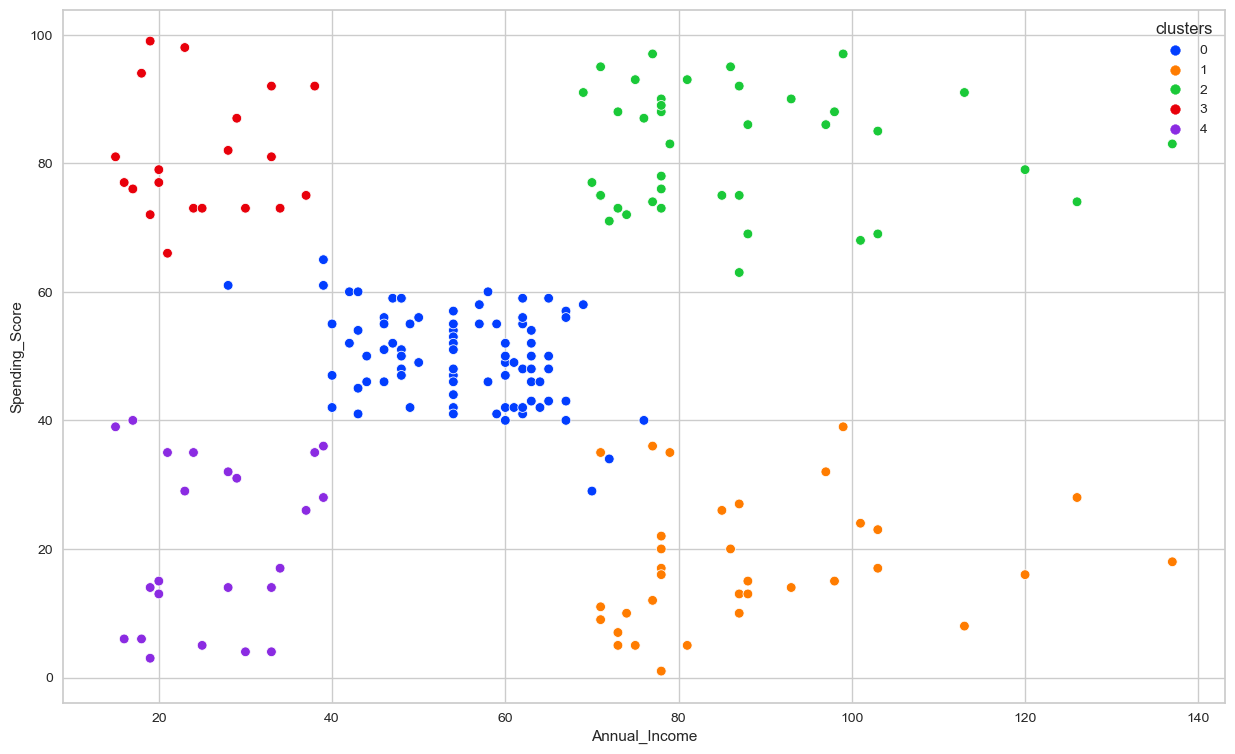

In [98]:
plt.figure(figsize=(15, 9))
sns.scatterplot(x='Annual_Income', y='Spending_Score',
                hue='clusters', data=X_h, palette="bright")

<Figure size 1500x900 with 0 Axes>

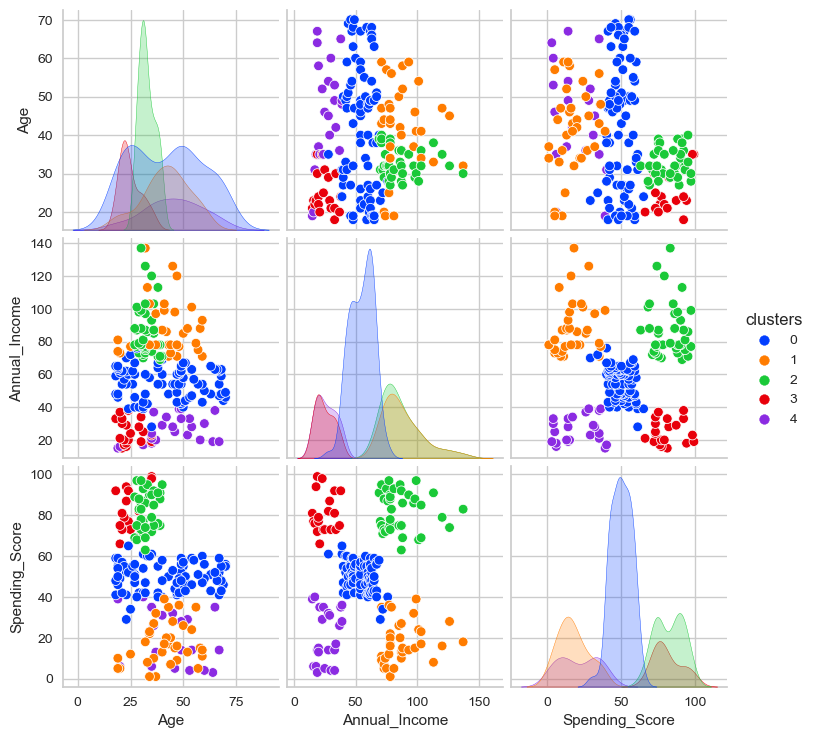

In [99]:
plt.figure(figsize=(15, 9))
sns.pairplot(hue='clusters', data=X_h, palette="bright")
plt.show()

#### Interpretation based on Age and Spending Score- x1

In [ ]:
df.head()

In [ ]:
df.clusterx1_k.value_counts()

In [ ]:
plt.figure(figsize=(14, 10))

ax = sns.countplot(data=df, x='clusterx1_k')
for p in ax.containers:
    ax.bar_label(p)
plt.show()

In [ ]:
plt.figure(figsize=(14, 10))
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.clusterx1_k, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)
plt.show()

In [ ]:
df.drop(['clusterx2_k', 'clusterx1_h', 'clusterx2_h'],
        axis=1).groupby("clusterx1_k").mean()

In [ ]:
ax = df.drop(['clusterx2_k', 'clusterx1_h', 'clusterx2_h'], axis=1).groupby("clusterx1_k").mean().plot(
    kind='bar', figsize=(20, 6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")
plt.show()

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [ ]:
df.clusterx2_k.value_counts()

In [ ]:
plt.figure(figsize=(14, 10))

ax = sns.countplot(data=df, x='clusterx2_k')
for p in ax.containers:
    ax.bar_label(p)
plt.show()

In [ ]:
plt.figure(figsize=(14, 10))
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.clusterx2_k, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)
plt.show()

In [ ]:
df.drop(['clusterx1_k', 'clusterx1_h', 'clusterx2_h'],
        axis=1).groupby("clusterx2_k").mean()

In [ ]:
df.groupby(["Gender", "clusterx2_k"]).mean()

In [ ]:
ax = df.drop(['clusterx1_k', 'clusterx1_h', 'clusterx2_h'], axis=1).groupby("clusterx2_k").mean().plot(
    kind='bar', figsize=(20, 6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")
plt.show()

In [ ]:
ax = df.drop(['clusterx1_k', 'clusterx1_h', 'clusterx2_h'], axis=1).groupby(["Gender", "clusterx2_k"]).mean().plot(
    kind='bar', figsize=(20, 6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")
plt.show()

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___